In [1]:
import numpy as np
import pandas as pd

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

2023-06-28 20:16:46.923772: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-28 20:16:46.924041: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-06-28 20:16:48.698188: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 20s 42ms/step - loss: 0.4940 - accuracy: 0.8228 - val_loss: 0.3635 - val_accuracy: 0.8728
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.3144 - accuracy: 0.8878 - val_loss: 0.3138 - val_accuracy: 0.8875
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.2712 - accuracy: 0.9032 - val_loss: 0.2975 - val_accuracy: 0.8935
Epoch 4/10
469/469 [==============================] - 19s 40ms/step - loss: 0.2402 - accuracy: 0.9124 - val_loss: 0.2671 - val_accuracy: 0.9049
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.2166 - accuracy: 0.9214 - val_loss: 0.2651 - val_accuracy: 0.9045
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1966 - accuracy: 0.9276 - val_loss: 0.2557 - val_accuracy: 0.9065
Epoch 7/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1800 - accuracy: 0.9351 - val_loss: 0.2650 - val_accuracy: 0.9091
Epo

In [12]:
model.save("models/clothing.h5")

In [13]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.493990,0.822800,0.363490,0.8728
1,0.314432,0.887800,0.313798,0.8875
2,0.271187,0.903250,0.297533,0.8935
3,0.240240,0.912433,0.267064,0.9049
4,0.216552,0.921400,0.265058,0.9045


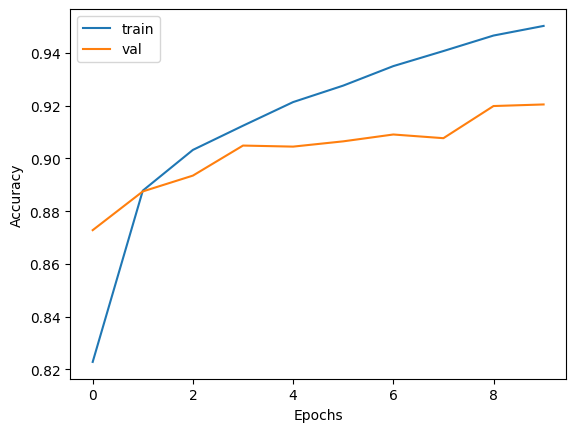

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

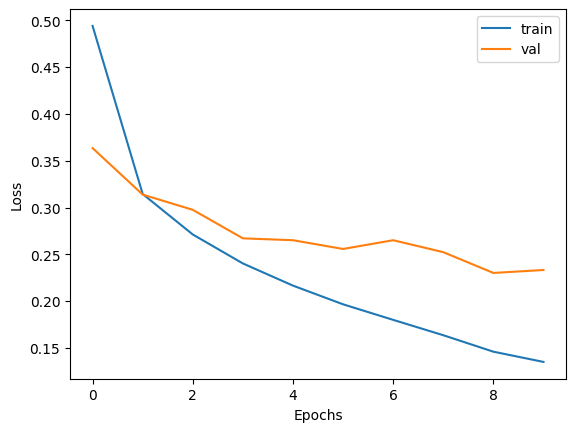

In [15]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2332 - accuracy: 0.9205
Test accuracy: 0.9204999804496765
